In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
del df["Lat"]
del df["Long"]

In [3]:
df.columns

Index(['Province/State', 'Country/Region', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       ...
       '4/28/21', '4/29/21', '4/30/21', '5/1/21', '5/2/21', '5/3/21', '5/4/21',
       '5/5/21', '5/6/21', '5/7/21'],
      dtype='object', length=474)

In [4]:
latest_column_key = df.columns[-1]
df = df[['Province/State','Country/Region',latest_column_key]]
df = df.rename(columns={latest_column_key:"latest_confirmed"})
df.head()

,Province/State,Country/Region,latest_confirmed
0,NaN,Afghanistan,61455
1,NaN,Albania,131577
2,NaN,Algeria,123692
3,NaN,Andorra,13390
4,NaN,Angola,28201


In [5]:
country = df.groupby(["Country/Region"],as_index=False).sum("latest_confirmed")
country = country.sort_values("latest_confirmed", ascending=False)

In [6]:
country.head(100)

,Country/Region,latest_confirmed
178,US,32651865
79,India,21892676
23,Brazil,15082449
62,France,5808421
177,Turkey,4998089
...,...,...
67,Ghana,92856
190,Zambia,92004
61,Finland,88332
172,Thailand,78855


In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


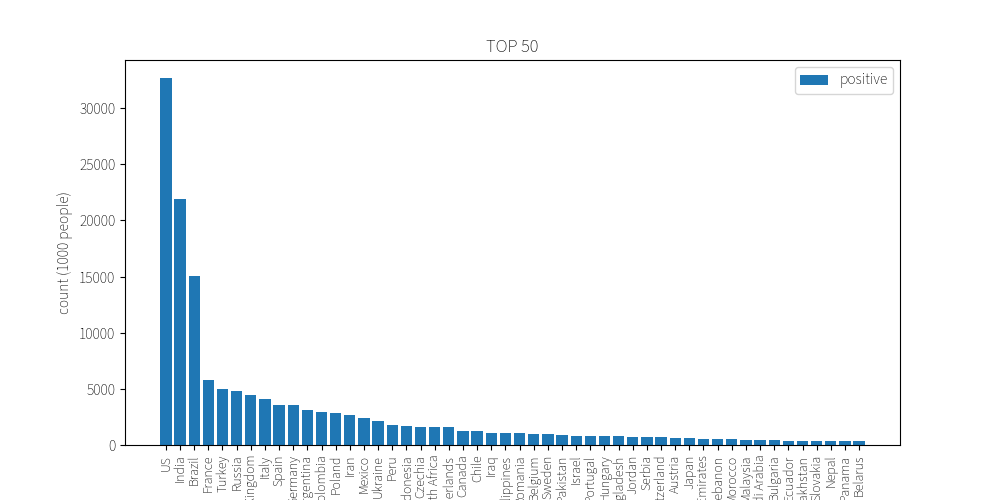

In [12]:
plt.figure(figsize=(10,5))
plt.title("TOP 50")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("count (1000 people)")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.bar(country.head(50)["Country/Region"],country.head(50)["latest_confirmed"]/1000,label="positive")
plt.legend()

#### 